# Importar Librerías Necesarias
Importar las librerías necesarias

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Cargar Conjunto de Datos
Cargar el conjunto de datos Global_Health_Statistics.csv en un DataFrame de pandas.

In [180]:
# Cargar el conjunto de datos Global_Health_Statistics.csv
df = pd.read_csv('/home/feliciano/PIA/Proyecto_Analisis/Global_Health_Statistics.csv')

# Mostrar las primeras filas del DataFrame
df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


# Acerca del dataset

Este conjunto de datos proporciona estadísticas completas sobre la salud global, centrándose en diversas enfermedades, tratamientos y resultados. Los datos abarcan múltiples países y años, el conjunto de datos incluye información sobre la prevalencia, incidencia y tasas de mortalidad de las principales enfermedades, así como la efectividad de los tratamientos y la infraestructura sanitaria.

## Casos de Uso del Conjunto de Datos

Este conjunto de datos puede ser utilizado para:

- **Análisis de Políticas de Salud**: Comprender qué enfermedades son más prevalentes y qué países requieren más inversión en infraestructura sanitaria.
- **Estudios Epidemiológicos**: Estudiar la correlación entre la prevalencia de enfermedades y factores socioeconómicos como ingresos, educación y urbanización.
- **Modelos de Aprendizaje Automático**: Entrenar modelos predictivos para pronosticar tendencias de enfermedades, tasas de mortalidad y efectividad de tratamientos basados en datos históricos.
- **Investigación en Salud Global**: Identificar regiones que necesitan intervenciones específicas o campañas de salud pública.

# Exploración Inicial de Datos

##### Analizamos el dataset columna a columna para verificar que los datos estan correctamente y no hay valores faltantes

In [181]:
# Analizar la columna 'Country'
print("Valores únicos en 'Country':", df['Country'].nunique())
print("Valores faltantes en 'Country':", df['Country'].isnull().sum())
print("Tipos de datos en 'Country':", df['Country'].dtype)

Valores únicos en 'Country': 20
Valores faltantes en 'Country': 0
Tipos de datos en 'Country': object


In [182]:
# Analizar la columna 'Year'
print("Valores únicos en 'Year':", df['Year'].nunique())
print("Valores faltantes en 'Year':", df['Year'].isnull().sum())
print("Tipos de datos en 'Year':", df['Year'].dtype)

Valores únicos en 'Year': 25
Valores faltantes en 'Year': 0
Tipos de datos en 'Year': int64


In [183]:
# Analizar la columna 'Disease Name'
print("Valores únicos en 'Disease Name':", df['Disease Name'].nunique())
print("Valores faltantes en 'Disease Name':", df['Disease Name'].isnull().sum())
print("Tipos de datos en 'Disease Name':", df['Disease Name'].dtype)

Valores únicos en 'Disease Name': 20
Valores faltantes en 'Disease Name': 0
Tipos de datos en 'Disease Name': object


In [184]:
# Analizar la columna 'Disease Category'
print("Valores únicos en 'Disease Category':", df['Disease Category'].nunique())
print("Valores faltantes en 'Disease Category':", df['Disease Category'].isnull().sum())
print("Tipos de datos en 'Disease Category':", df['Disease Category'].dtype)

Valores únicos en 'Disease Category': 11
Valores faltantes en 'Disease Category': 0
Tipos de datos en 'Disease Category': object


In [185]:
# Analizar la columna 'Prevalence Rate (%)'
print("Valores únicos en 'Prevalence Rate (%)':", df['Prevalence Rate (%)'].nunique())
print("Valores faltantes en 'Prevalence Rate (%)':", df['Prevalence Rate (%)'].isnull().sum())
print("Tipos de datos en 'Prevalence Rate (%)':", df['Prevalence Rate (%)'].dtype)

Valores únicos en 'Prevalence Rate (%)': 1991
Valores faltantes en 'Prevalence Rate (%)': 0
Tipos de datos en 'Prevalence Rate (%)': float64


In [186]:
# Analizar la columna 'Incidence Rate (%)'
print("Valores únicos en 'Incidence Rate (%)':", df['Incidence Rate (%)'].nunique())
print("Valores faltantes en 'Incidence Rate (%)':", df['Incidence Rate (%)'].isnull().sum())
print("Tipos de datos en 'Incidence Rate (%)':", df['Incidence Rate (%)'].dtype)

Valores únicos en 'Incidence Rate (%)': 1491
Valores faltantes en 'Incidence Rate (%)': 0
Tipos de datos en 'Incidence Rate (%)': float64


In [187]:
# Analizar la columna 'Mortality Rate (%)'
print("Valores únicos en 'Mortality Rate (%)':", df['Mortality Rate (%)'].nunique())
print("Valores faltantes en 'Mortality Rate (%)':", df['Mortality Rate (%)'].isnull().sum())
print("Tipos de datos en 'Mortality Rate (%)':", df['Mortality Rate (%)'].dtype)

Valores únicos en 'Mortality Rate (%)': 991
Valores faltantes en 'Mortality Rate (%)': 0
Tipos de datos en 'Mortality Rate (%)': float64


In [188]:
# Analizar la columna 'Age Group'
print("Valores únicos en 'Age Group':", df['Age Group'].nunique())
print("Valores faltantes en 'Age Group':", df['Age Group'].isnull().sum())
print("Tipos de datos en 'Age Group':", df['Age Group'].dtype)

Valores únicos en 'Age Group': 4
Valores faltantes en 'Age Group': 0
Tipos de datos en 'Age Group': object


In [189]:
# Analizar la columna 'Gender'
print("Valores únicos en 'Gender':", df['Gender'].nunique())
print("Valores faltantes en 'Gender':", df['Gender'].isnull().sum())
print("Tipos de datos en 'Gender':", df['Gender'].dtype)

Valores únicos en 'Gender': 3
Valores faltantes en 'Gender': 0
Tipos de datos en 'Gender': object


In [190]:
# Analizar la columna 'Population Affected'
print("Valores únicos en 'Population Affected':", df['Population Affected'].nunique())
print("Valores faltantes en 'Population Affected':", df['Population Affected'].isnull().sum())
print("Tipos de datos en 'Population Affected':", df['Population Affected'].dtype)

Valores únicos en 'Population Affected': 632061
Valores faltantes en 'Population Affected': 0
Tipos de datos en 'Population Affected': int64


In [191]:
# Analizar la columna 'Healthcare Access (%)'
print("Valores únicos en 'Healthcare Access (%)':", df['Healthcare Access (%)'].nunique())
print("Valores faltantes en 'Healthcare Access (%)':", df['Healthcare Access (%)'].isnull().sum())
print("Tipos de datos en 'Healthcare Access (%)':", df['Healthcare Access (%)'].dtype)

Valores únicos en 'Healthcare Access (%)': 5001
Valores faltantes en 'Healthcare Access (%)': 0
Tipos de datos en 'Healthcare Access (%)': float64


In [192]:
# Analizar la columna 'Doctors per 1000'
print("Valores únicos en 'Doctors per 1000':", df['Doctors per 1000'].nunique())
print("Valores faltantes en 'Doctors per 1000':", df['Doctors per 1000'].isnull().sum())
print("Tipos de datos en 'Doctors per 1000':", df['Doctors per 1000'].dtype)

Valores únicos en 'Doctors per 1000': 451
Valores faltantes en 'Doctors per 1000': 0
Tipos de datos en 'Doctors per 1000': float64


In [193]:
# Analizar la columna 'Hospital Beds per 1000'
print("Valores únicos en 'Hospital Beds per 1000':", df['Hospital Beds per 1000'].nunique())
print("Valores faltantes en 'Hospital Beds per 1000':", df['Hospital Beds per 1000'].isnull().sum())
print("Tipos de datos en 'Hospital Beds per 1000':", df['Hospital Beds per 1000'].dtype)

Valores únicos en 'Hospital Beds per 1000': 951
Valores faltantes en 'Hospital Beds per 1000': 0
Tipos de datos en 'Hospital Beds per 1000': float64


In [194]:
# Analizar la columna 'Treatment Type'
print("Valores únicos en 'Treatment Type':", df['Treatment Type'].nunique())
print("Valores faltantes en 'Treatment Type':", df['Treatment Type'].isnull().sum())
print("Tipos de datos en 'Treatment Type':", df['Treatment Type'].dtype)

Valores únicos en 'Treatment Type': 4
Valores faltantes en 'Treatment Type': 0
Tipos de datos en 'Treatment Type': object


In [195]:
# Analizar la columna 'Average Treatment Cost (USD)'
print("Valores únicos en 'Average Treatment Cost (USD)':", df['Average Treatment Cost (USD)'].nunique())
print("Valores faltantes en 'Average Treatment Cost (USD)':", df['Average Treatment Cost (USD)'].isnull().sum())
print("Tipos de datos en 'Average Treatment Cost (USD)':", df['Average Treatment Cost (USD)'].dtype)

Valores únicos en 'Average Treatment Cost (USD)': 49901
Valores faltantes en 'Average Treatment Cost (USD)': 0
Tipos de datos en 'Average Treatment Cost (USD)': int64


In [196]:
# Analizar la columna 'Availability of Vaccines/Treatment'
print("Valores únicos en 'Availability of Vaccines/Treatment':", df['Availability of Vaccines/Treatment'].nunique())
print("Valores faltantes en 'Availability of Vaccines/Treatment':", df['Availability of Vaccines/Treatment'].isnull().sum())
print("Tipos de datos en 'Availability of Vaccines/Treatment':", df['Availability of Vaccines/Treatment'].dtype)

Valores únicos en 'Availability of Vaccines/Treatment': 2
Valores faltantes en 'Availability of Vaccines/Treatment': 0
Tipos de datos en 'Availability of Vaccines/Treatment': object


In [197]:
# Analizar la columna 'Recovery Rate (%)'
print("Valores únicos en 'Recovery Rate (%)':", df['Recovery Rate (%)'].nunique())
print("Valores faltantes en 'Recovery Rate (%)':", df['Recovery Rate (%)'].isnull().sum())
print("Tipos de datos en 'Recovery Rate (%)':", df['Recovery Rate (%)'].dtype)

Valores únicos en 'Recovery Rate (%)': 4901
Valores faltantes en 'Recovery Rate (%)': 0
Tipos de datos en 'Recovery Rate (%)': float64


In [198]:
# Analizar la columna 'DALYs'
print("Valores únicos en 'DALYs':", df['DALYs'].nunique())
print("Valores faltantes en 'DALYs':", df['DALYs'].isnull().sum())
print("Tipos de datos en 'DALYs':", df['DALYs'].dtype)

Valores únicos en 'DALYs': 5000
Valores faltantes en 'DALYs': 0
Tipos de datos en 'DALYs': int64


In [199]:
# Analizar la columna 'Improvement in 5 Years (%)'
print("Valores únicos en 'Improvement in 5 Years (%)':", df['Improvement in 5 Years (%)'].nunique())
print("Valores faltantes en 'Improvement in 5 Years (%)':", df['Improvement in 5 Years (%)'].isnull().sum())
print("Tipos de datos en 'Improvement in 5 Years (%)':", df['Improvement in 5 Years (%)'].dtype)

Valores únicos en 'Improvement in 5 Years (%)': 1001
Valores faltantes en 'Improvement in 5 Years (%)': 0
Tipos de datos en 'Improvement in 5 Years (%)': float64


In [200]:
# Analizar la columna 'Per Capita Income (USD)'
print("Valores únicos en 'Per Capita Income (USD)':", df['Per Capita Income (USD)'].nunique())
print("Valores faltantes en 'Per Capita Income (USD)':", df['Per Capita Income (USD)'].isnull().sum())
print("Tipos de datos en 'Per Capita Income (USD)':", df['Per Capita Income (USD)'].dtype)

Valores únicos en 'Per Capita Income (USD)': 99498
Valores faltantes en 'Per Capita Income (USD)': 0
Tipos de datos en 'Per Capita Income (USD)': int64


In [201]:
# Analizar la columna 'Education Index'
print("Valores únicos en 'Education Index':", df['Education Index'].nunique())
print("Valores faltantes en 'Education Index':", df['Education Index'].isnull().sum())
print("Tipos de datos en 'Education Index':", df['Education Index'].dtype)

Valores únicos en 'Education Index': 51
Valores faltantes en 'Education Index': 0
Tipos de datos en 'Education Index': float64


In [202]:
# Analizar la columna 'Urbanization Rate (%)'
print("Valores únicos en 'Urbanization Rate (%)':", df['Urbanization Rate (%)'].nunique())
print("Valores faltantes en 'Urbanization Rate (%)':", df['Urbanization Rate (%)'].isnull().sum())
print("Tipos de datos en 'Urbanization Rate (%)':", df['Urbanization Rate (%)'].dtype)

Valores únicos en 'Urbanization Rate (%)': 7001
Valores faltantes en 'Urbanization Rate (%)': 0
Tipos de datos en 'Urbanization Rate (%)': float64


#### Una vez hemos verificado cada columna, hacemos el .info para ver la información sobre el tipo de datos y el tamaño de cada una de las columnas

In [203]:
# Mostrar información sobre el DataFrame, incluyendo tipos de datos y conteo de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

#### Vamos a categorizar las columnas "Gender", "Age Group" y "Availability of Vaccines/Treatment" para optimizar el manejo de estas ya que sus valores son siempre los mismos


In [204]:
# Convertir columnas a categórias
categorical_columns = ['Age Group', 'Gender', 'Availability of Vaccines/Treatment']
for col in categorical_columns:
    df[col] = df[col].astype('category')

#### Procedemos a ver un resumen de los datos, con describe

In [205]:
df.describe()

,Year,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Average Treatment Cost (USD),Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2011.996999,10.047992,7.555005,5.049919,500735.427363,74.987835,2.747929,5.245931,25010.313665,74.496934,2499.144809,5.002593,50311.099835,0.650069,54.985212
std,7.217287,5.740189,4.298947,2.859427,288660.116648,14.436345,1.299067,2.742865,14402.279227,14.155168,1443.923798,2.888298,28726.959359,0.144472,20.214042
min,2000.000000,0.100000,0.100000,0.100000,1000.000000,50.000000,0.500000,0.500000,100.000000,50.000000,1.000000,0.000000,500.000000,0.400000,20.000000
25%,2006.000000,5.090000,3.840000,2.580000,250491.250000,62.470000,1.620000,2.870000,12538.000000,62.220000,1245.000000,2.500000,25457.000000,0.530000,37.470000
50%,2012.000000,10.040000,7.550000,5.050000,501041.000000,75.000000,2.750000,5.240000,24980.000000,74.470000,2499.000000,5.000000,50372.000000,0.650000,54.980000
75%,2018.000000,15.010000,11.280000,7.530000,750782.000000,87.490000,3.870000,7.620000,37493.000000,86.780000,3750.000000,7.510000,75195.000000,0.780000,72.510000
max,2024.000000,20.000000,15.000000,10.000000,1000000.000000,100.000000,5.000000,10.000000,50000.000000,99.000000,5000.000000,10.000000,100000.000000,0.900000,90.000000


#### Descripción de las columnas tipo categórico y object, mostrando la cantidad con count y las opciones unicas de las columna junto con la frecuencia

In [206]:
# Mostrar estadísticas básicas del DataFrame
df.describe()
df.describe(include=['category'])

,Age Group,Gender,Availability of Vaccines/Treatment
count,1000000,1000000,1000000
unique,4,3,2
top,19-35,Male,Yes
freq,251201,333676,500354


In [207]:
df.describe()
df.describe(include=['object'])

,Country,Disease Name,Disease Category,Treatment Type
count,1000000,1000000,1000000,1000000
unique,20,20,11,4
top,Russia,COVID-19,Metabolic,Surgery
freq,50532,50404,91332,250528


# Análisis de Calidad de Datos
#### Analizar la calidad de los datos verificando valores faltantes, entradas duplicadas y tipos de datos inconsistentes.

#### Arriba anteriormente verificamos si habian valores faltantes pero lo volvemos a comprobar por si al cambiar el tipo de columna se ha roto alguna de ellas

In [208]:
# Verificar valores faltantes en el DataFrame
valores_faltantes = df.isnull().sum()
print("Valores faltantes en cada columna:\n", valores_faltantes)

Valores faltantes en cada columna:
 Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


#### Comprobamos si hay alguna entrada duplicada en nuestro dataset

In [209]:
# Verificar entradas duplicadas en el DataFrame
entradas_duplicadas = df.duplicated().sum()
print("Número de entradas duplicadas:", entradas_duplicadas)

Número de entradas duplicadas: 0


In [210]:
# Verificar valores únicos por columna
print("Valores únicos por columna:")
for columna in df.columns:
    print(f"{columna}: {df[columna].nunique()}")

Valores únicos por columna:
Country: 20
Year: 25
Disease Name: 20
Disease Category: 11
Prevalence Rate (%): 1991
Incidence Rate (%): 1491
Mortality Rate (%): 991
Age Group: 4
Gender: 3
Population Affected: 632061
Healthcare Access (%): 5001
Doctors per 1000: 451
Hospital Beds per 1000: 951
Treatment Type: 4
Average Treatment Cost (USD): 49901
Availability of Vaccines/Treatment: 2
Recovery Rate (%): 4901
DALYs: 5000
Improvement in 5 Years (%): 1001
Per Capita Income (USD): 99498
Education Index: 51
Urbanization Rate (%): 7001


#### Identificar valores atípicos (outliers)

In [211]:
# Función para encontrar outliers usando IQR
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return ((columna < limite_inferior) | (columna > limite_superior)).sum()

# Aplicar a todas las columnas numéricas
print("Valores atípicos por columna numérica:")
for columna in df.select_dtypes(include='number').columns:
    outliers = detectar_outliers(df[columna])
    print(f"{columna}: {outliers}")

Valores atípicos por columna numérica:
Year: 0
Prevalence Rate (%): 0
Incidence Rate (%): 0
Mortality Rate (%): 0
Population Affected: 0
Healthcare Access (%): 0
Doctors per 1000: 0
Hospital Beds per 1000: 0
Average Treatment Cost (USD): 0
Recovery Rate (%): 0
DALYs: 0
Improvement in 5 Years (%): 0
Per Capita Income (USD): 0
Education Index: 0
Urbanization Rate (%): 0


#### identificamos las posibles correlaciones entre variables numéricas

Matriz de correlación:
                                  Year  Prevalence Rate (%)  \
Year                          1.000000            -0.000818   
Prevalence Rate (%)          -0.000818             1.000000   
Incidence Rate (%)           -0.000944             0.000338   
Mortality Rate (%)            0.000448             0.001284   
Population Affected           0.000686             0.000622   
Healthcare Access (%)        -0.001291            -0.000231   
Doctors per 1000             -0.000027             0.000418   
Hospital Beds per 1000       -0.000645             0.000468   
Average Treatment Cost (USD)  0.001275            -0.001128   
Recovery Rate (%)            -0.000273            -0.000201   
DALYs                         0.000816             0.000535   
Improvement in 5 Years (%)   -0.001223             0.000037   
Per Capita Income (USD)       0.000206             0.001049   
Education Index              -0.000610            -0.000185   
Urbanization Rate (%)         0.

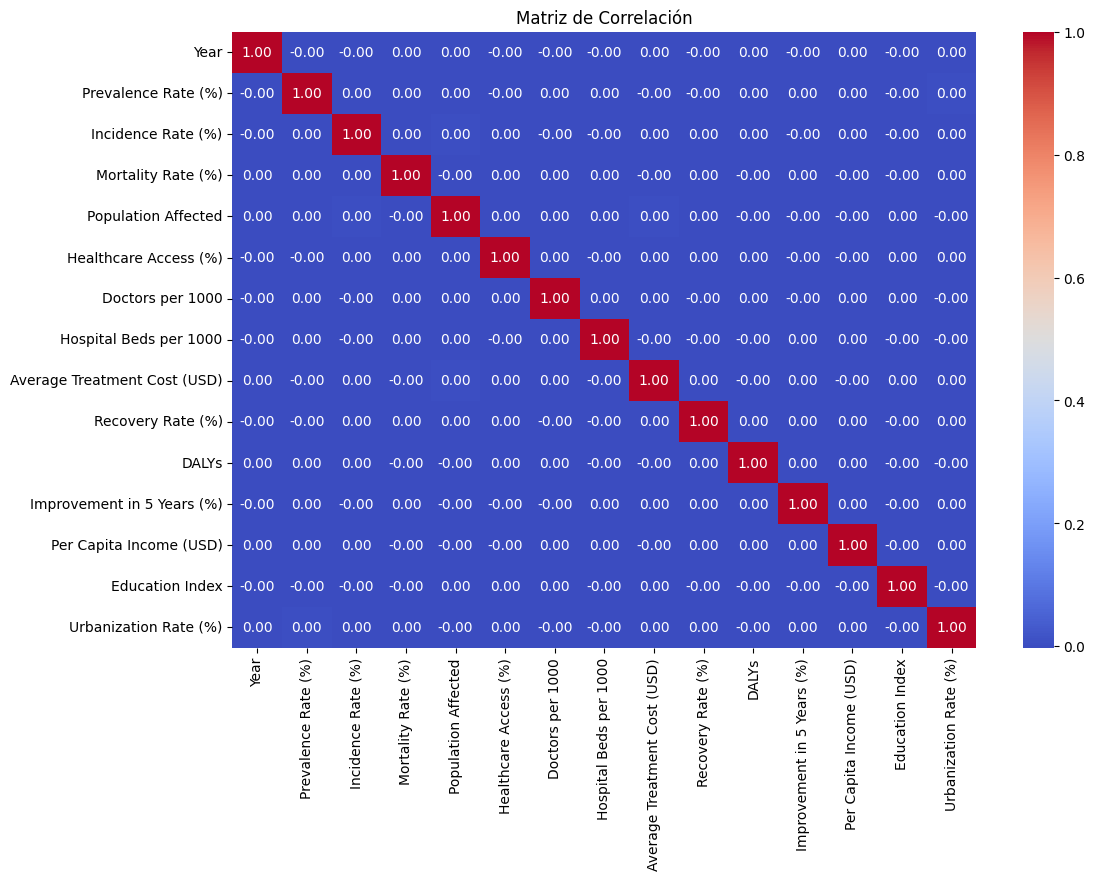

In [212]:
numeric_df = df.select_dtypes(include=[np.number])
print("Matriz de correlación:")
print(numeric_df.corr())

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


# Preprocesamiento de Datos
Preprocesar los datos manejando valores faltantes, eliminando duplicados y convirtiendo tipos de datos según sea necesario.

In [213]:
# Eliminar entradas duplicadas
df.drop_duplicates(inplace=True)

In [214]:
# Verificar los cambios
print("Valores faltantes después del preprocesamiento:\n", df.isnull().sum())
print("Número de entradas duplicadas después del preprocesamiento:", df.duplicated().sum())
print("Tipos de datos después del preprocesamiento:\n", df.dtypes)

Valores faltantes después del preprocesamiento:
 Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64
Número de entradas duplicadas después del preprocesamiento

# Análisis Exploratorio de Datos

#### Como al principio pusimos, este dataset se puede utilizar para muchas utilizades pero nosotros nos quedaremos con lo siguiente:

- **Análisis de Políticas de Salud**: Comprender qué enfermedades son más prevalentes y qué países requieren más inversión en infraestructura sanitaria.
- **Investigación en Salud Global**: Identificar regiones que necesitan intervenciones específicas o campañas de salud pública.

#### Una vez hemos elegido a que nos vamos a enfocar pasamos al analisis

#### Vamos a borrar las columnas que no sean relevantes o sean redundantes para nuestro analisis

In [215]:
# Eliminar las columnas especificadas
columnas_a_eliminar = ['Disease Name', 'Population Affected', 'Average Treatment Cost (USD)', 'Improvement in 5 Years (%)']
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificar los cambios
df.head()

,Country,Year,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Respiratory,0.95,1.55,8.42,0-18,Male,57.74,3.34,7.58,Medication,No,91.82,4493,16886,0.79,86.02
1,France,2002,Parasitic,12.46,8.63,8.75,61+,Male,89.21,1.33,5.11,Surgery,Yes,76.65,2366,80639,0.74,45.52
2,Turkey,2015,Genetic,0.91,2.35,6.22,36-60,Male,56.41,4.07,3.49,Vaccination,Yes,98.55,41,12245,0.41,40.20
3,Indonesia,2011,Autoimmune,4.68,6.29,3.99,0-18,Other,85.20,3.18,8.44,Surgery,Yes,67.35,3201,49336,0.49,58.47
4,Italy,2013,Genetic,0.83,13.59,7.01,61+,Male,67.00,4.61,5.90,Medication,Yes,50.06,2832,47701,0.50,48.14


#### Identificar qué categorías de enfermedades tienen mayor prevalencia global.

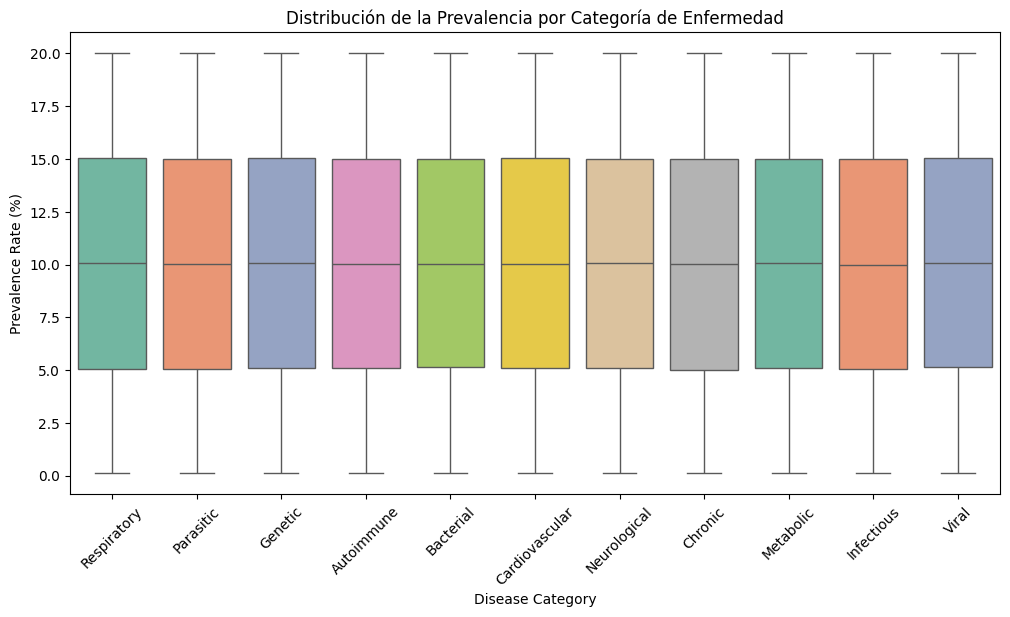

In [216]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Disease Category", y="Prevalence Rate (%)", palette="Set2")
plt.title("Distribución de la Prevalencia por Categoría de Enfermedad")
plt.xticks(rotation=45)
plt.show()

#### Visualizar qué países tienen mejor o peor infraestructura sanitaria usando un mapa de calor utilizando las columnas(Doctors per 1000 y Hospital Beds per 1000)

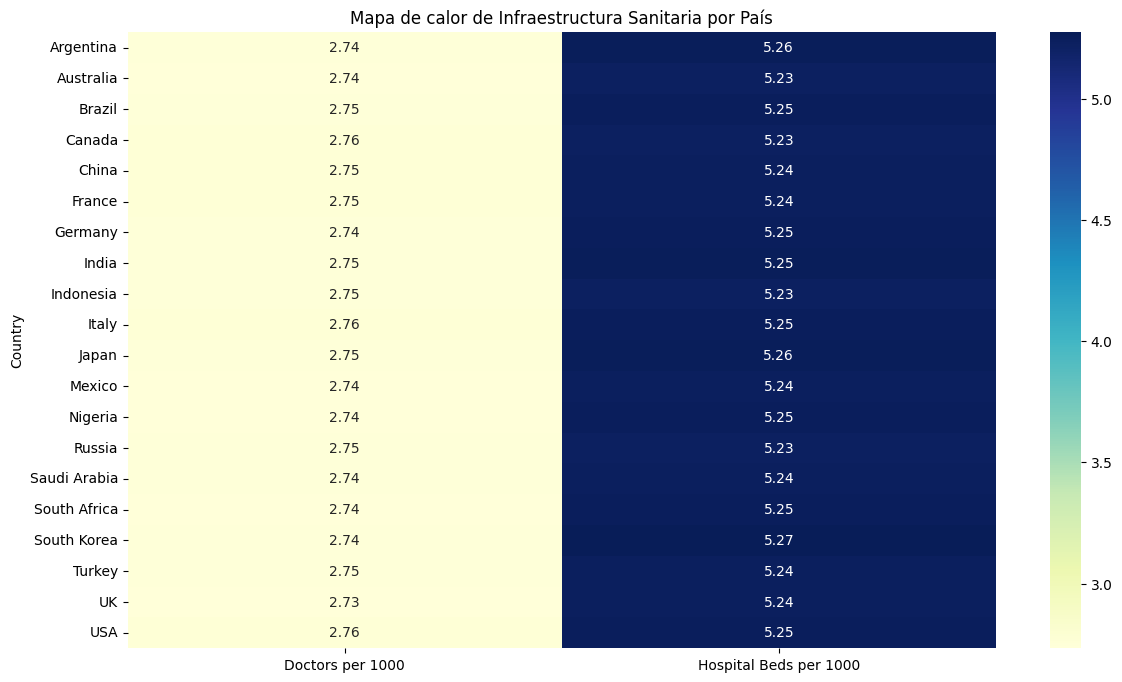

In [217]:
infra_data = df.groupby('Country')[['Doctors per 1000', 'Hospital Beds per 1000']].mean().reset_index()

plt.figure(figsize=(14, 8))
infra_pivot = infra_data.pivot_table(index='Country', values=['Doctors per 1000', 'Hospital Beds per 1000'])
sns.heatmap(infra_pivot, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Mapa de calor de Infraestructura Sanitaria por País")
plt.show()

#### Mortalidad por región y género, Comparar tasas de mortalidad entre géneros y países

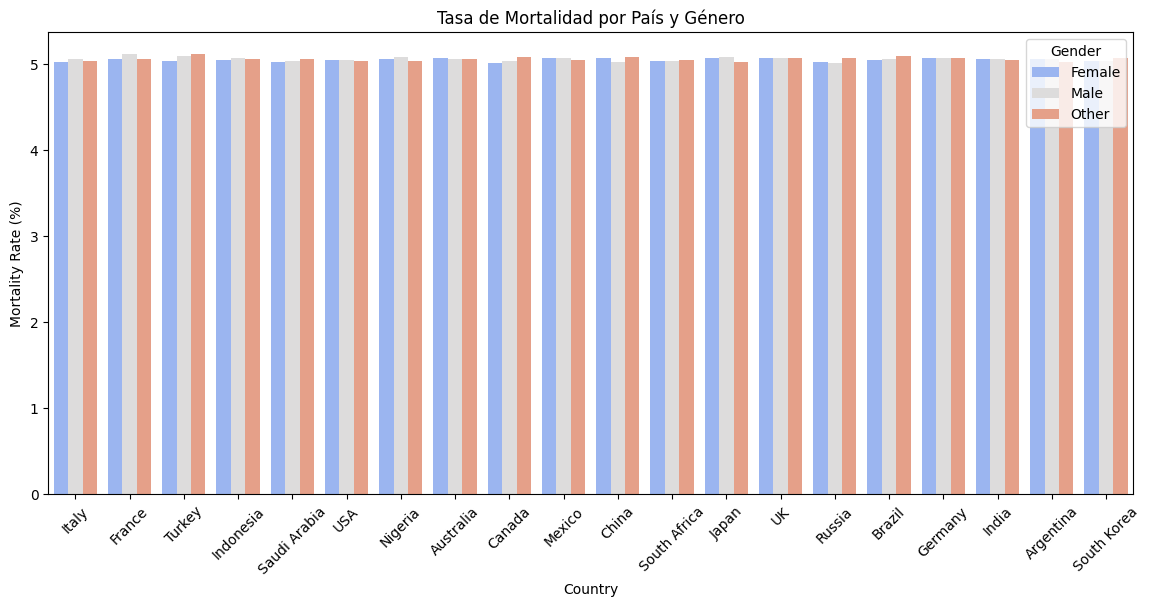

In [218]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x="Country", y="Mortality Rate (%)", hue="Gender", ci=None, palette="coolwarm")
plt.title("Tasa de Mortalidad por País y Género")
plt.xticks(rotation=45)
plt.show()

#### Comparación de prevalencia y mortalidad por enfermedad, Visualizar qué enfermedades tienen mayor prevalencia y mortalidad

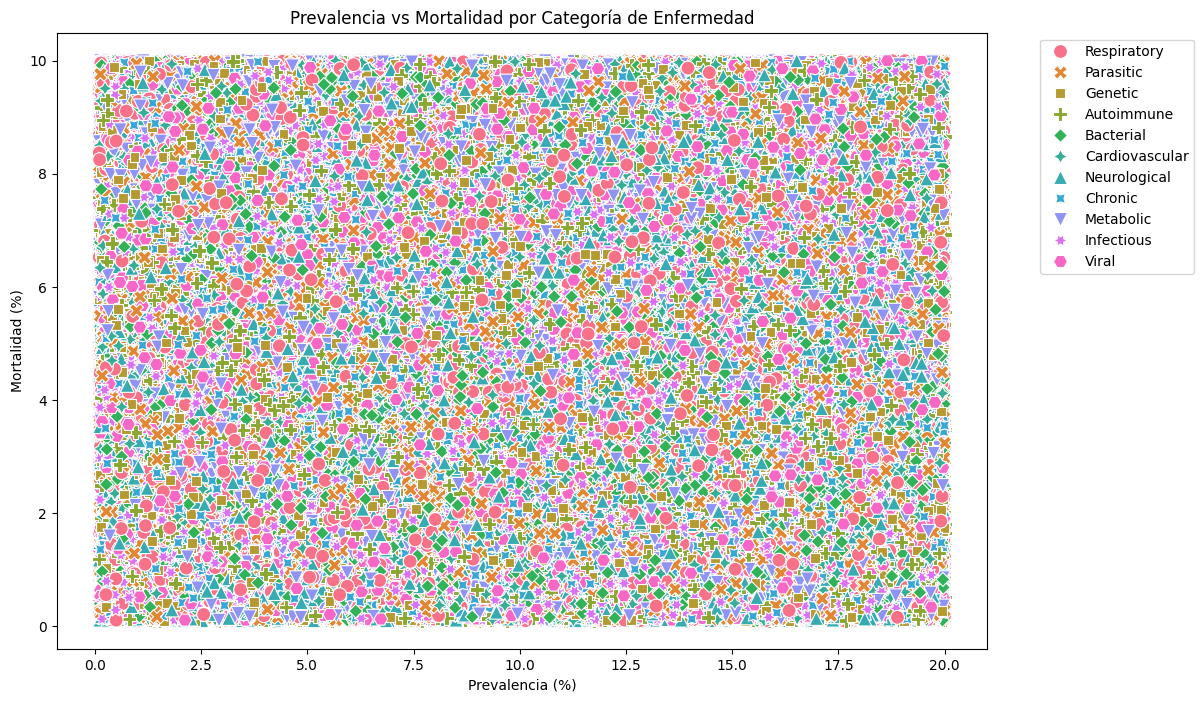

In [219]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="Prevalence Rate (%)", y="Mortality Rate (%)", hue="Disease Category", style="Disease Category", s=100)
plt.title("Prevalencia vs Mortalidad por Categoría de Enfermedad")
plt.xlabel("Prevalencia (%)")
plt.ylabel("Mortalidad (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Comparación socioeconómica y salud, Analizar si el ingreso per cápita está relacionado con la infraestructura sanitaria

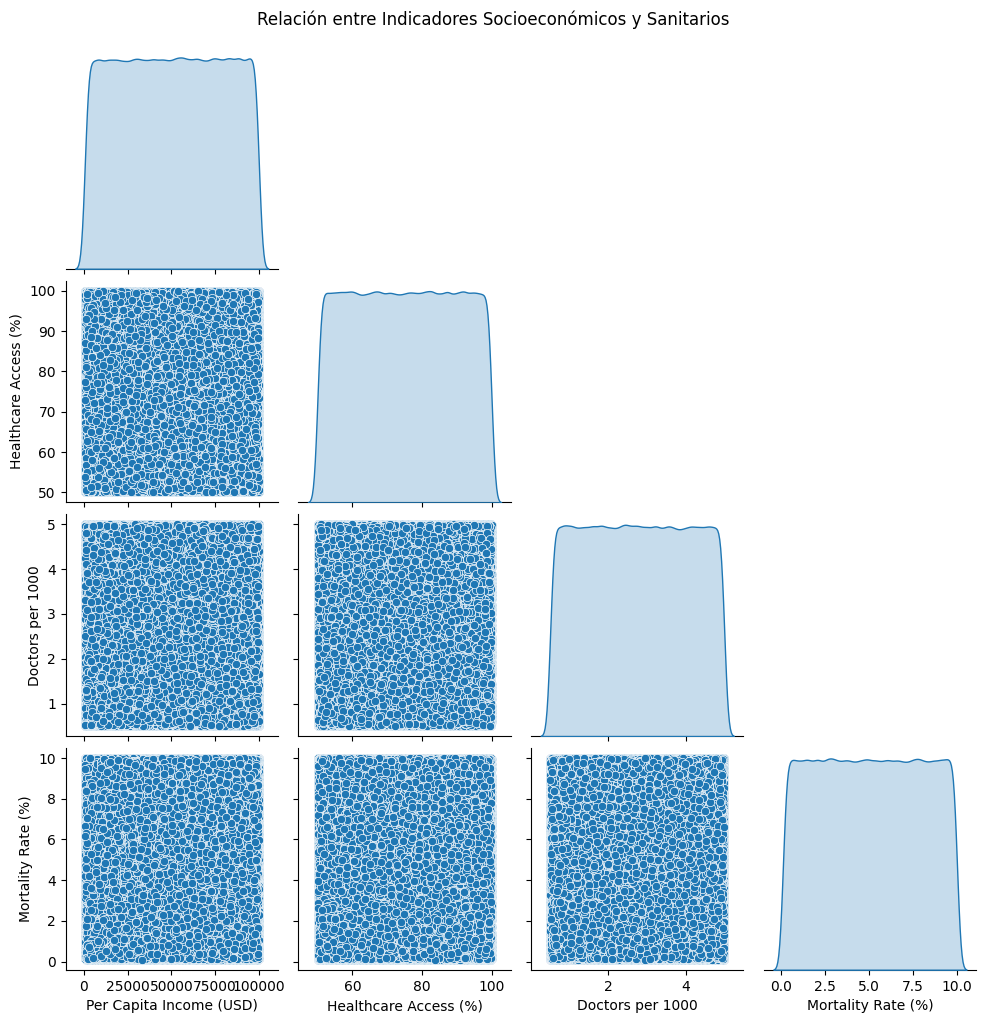

In [220]:
cols = ["Per Capita Income (USD)", "Healthcare Access (%)", "Doctors per 1000", "Mortality Rate (%)"]
sns.pairplot(df[cols], diag_kind="kde", corner=True)
plt.suptitle("Relación entre Indicadores Socioeconómicos y Sanitarios", y=1.02)
plt.show()

#### Distribución de Años de vida ajustados por discapacidad por País, para ver qué países tienen mayores cargas de enfermedad en términos de años de vida perdidos debido a enfermedades

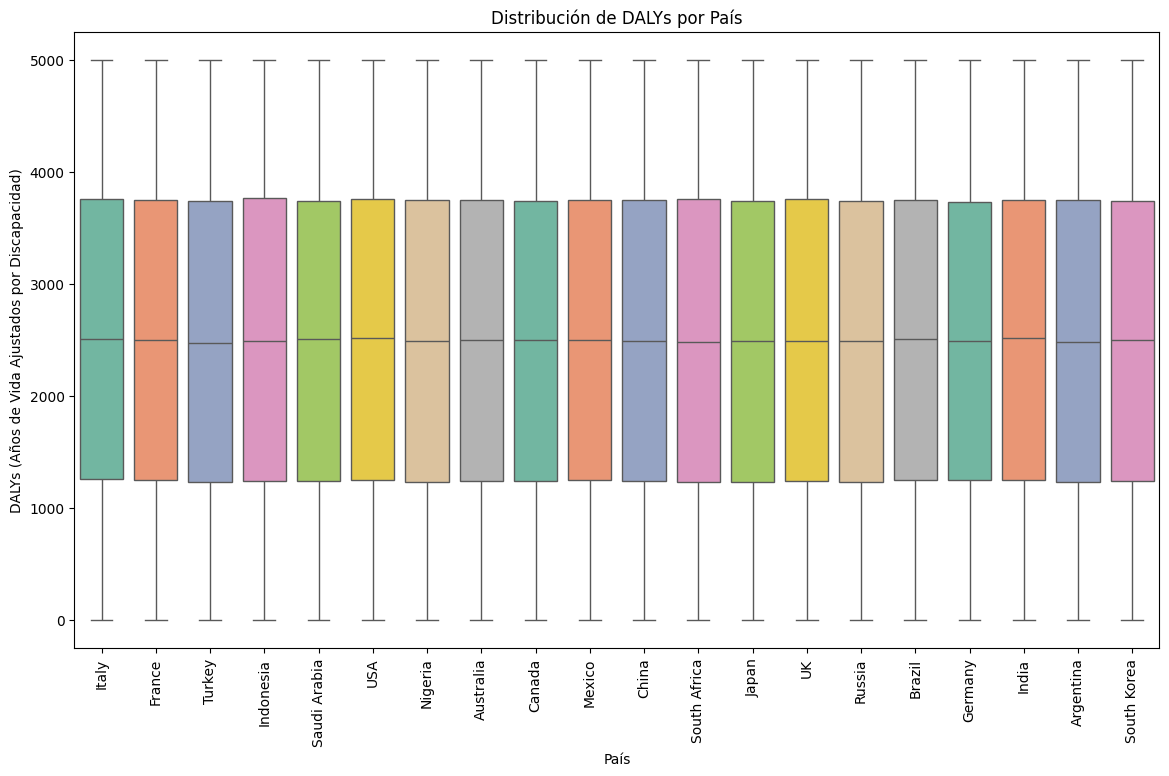

In [228]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="Country", y="DALYs", palette="Set2")
plt.title("Distribución de DALYs por País")
plt.xticks(rotation=90)
plt.ylabel("DALYs (Años de Vida Ajustados por Discapacidad)")
plt.xlabel("País")
plt.show()

#### Evolución de la Prevalencia de Enfermedades a lo largo de los Años

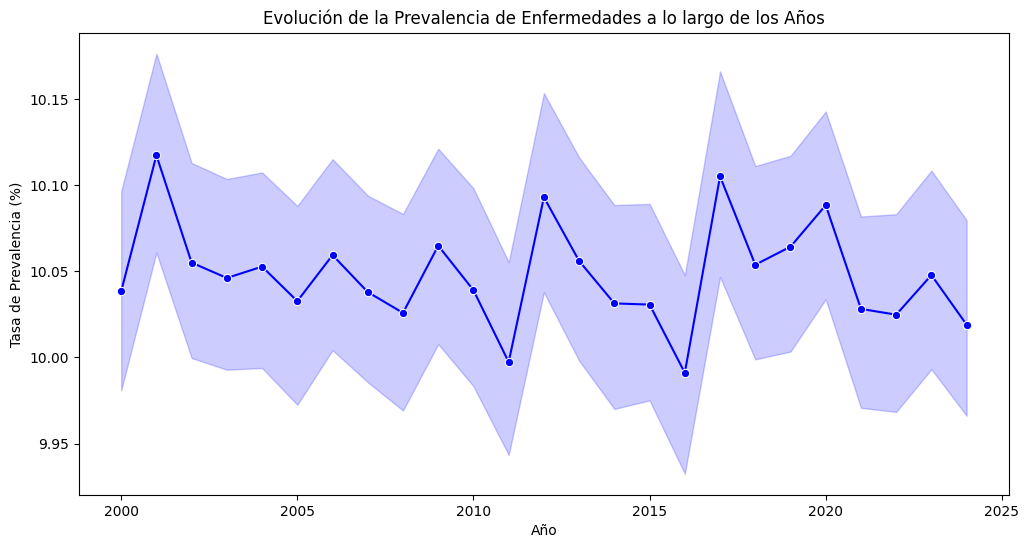

In [229]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Prevalence Rate (%)", marker="o", color="b")
plt.title("Evolución de la Prevalencia de Enfermedades a lo largo de los Años")
plt.xlabel("Año")
plt.ylabel("Tasa de Prevalencia (%)")
plt.show()


#### Mortalidad por Año, Analizar cómo ha evolucionado la mortalidad por año para evaluar si ha habido mejoras en las tasas de mortalidad a lo largo del tiempo


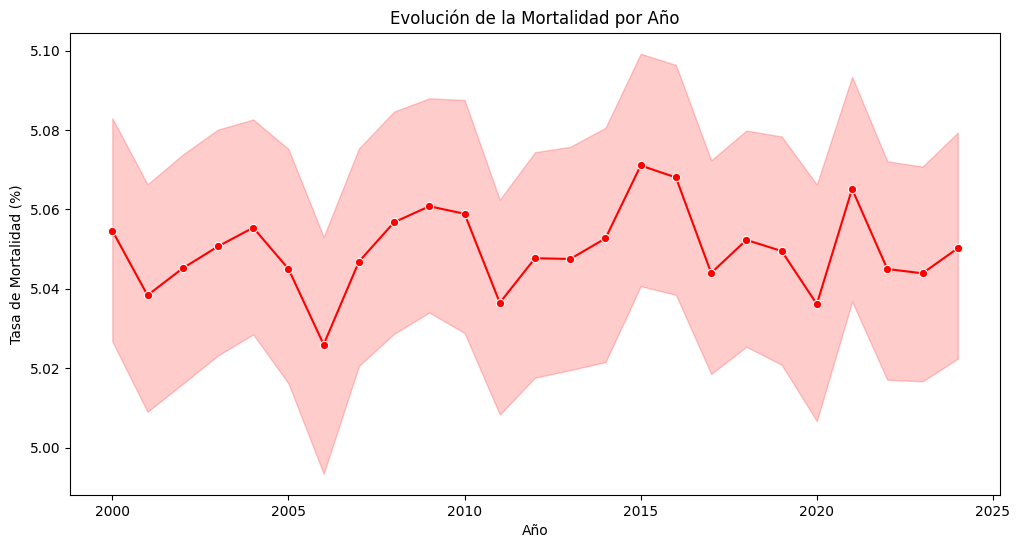

In [230]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Mortality Rate (%)", marker="o", color="r")
plt.title("Evolución de la Mortalidad por Año")
plt.xlabel("Año")
plt.ylabel("Tasa de Mortalidad (%)")
plt.show()


#### Analizar cómo ha evolucionado la carga de enfermedad (DALYs) en los últimos años

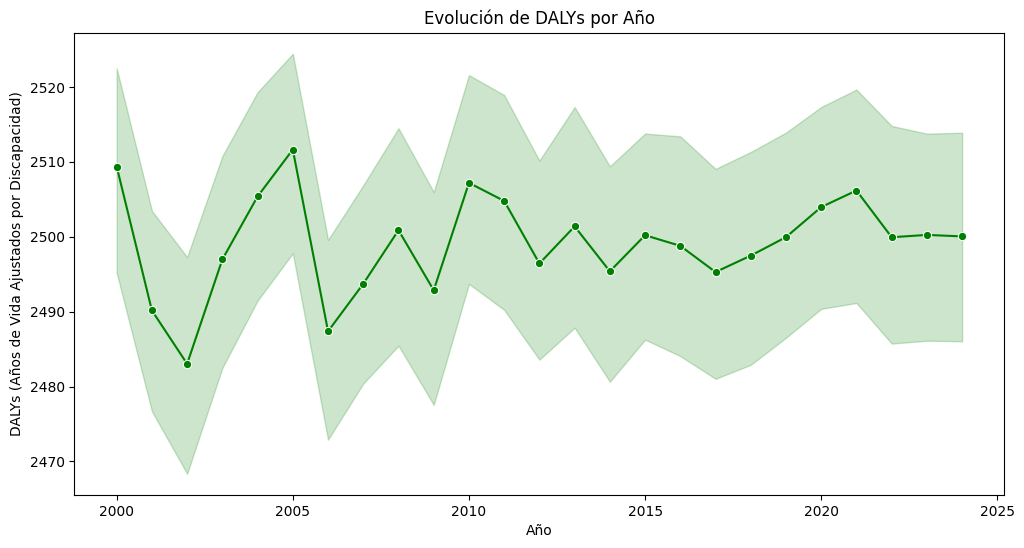

In [231]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="DALYs", marker="o", color="g")
plt.title("Evolución de DALYs por Año")
plt.xlabel("Año")
plt.ylabel("DALYs (Años de Vida Ajustados por Discapacidad)")
plt.show()


#### Acceso a la salud por Año, Examinar cómo ha evolucionado el acceso a la salud en el tiempo.


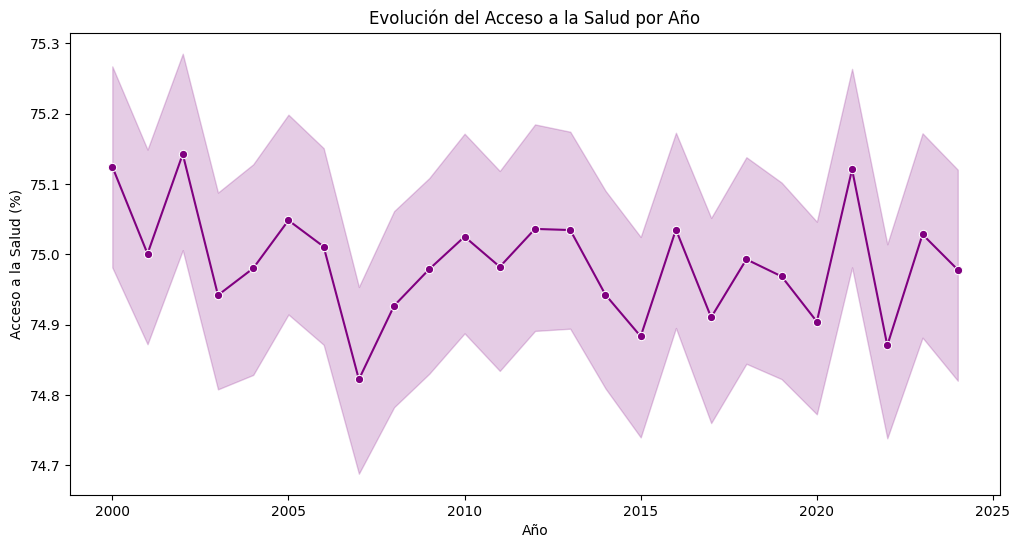

In [232]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Healthcare Access (%)", marker="o", color="purple")
plt.title("Evolución del Acceso a la Salud por Año")
plt.xlabel("Año")
plt.ylabel("Acceso a la Salud (%)")
plt.show()
